------------------------------- WELCOME TO THE ACOUSTIC EXTINGUISHER PROJECT ! ---------------------------

Coproduced with Eugénia M., Doriane DD. and Jérémie L. during "Fullstack Data Science Jedha Bootcamp" 2024

## **Importation librairies**

In [ ]:
# Importation librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

## **Lecture dataset**

In [ ]:
# Lecture du dataset

df = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx')
print('Overview of the dataset (20 first rows): ')
print()
display(df.head(20))

Overview of the dataset (20 first rows): 



,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1
8,1,gasoline,10,102,13.3,55,1
9,1,gasoline,10,93,15.4,52,1


In [ ]:
# Shape du dataset
print('Shape du dataset : ', df.shape)
print('------------------------------------------------------------------------------')
print()

# Nombre de lignes et colonnes
print('Nombre de lignes : ', df.shape[0], '\n', 'Nombre de colonnes : ', df.shape[1])
print('------------------------------------------------------------------------------')
print()

# Nom des colonnes
print("Nom des colonnes : ", [col for col in df])
print('------------------------------------------------------------------------------')
print()

# Valeurs manquantes
print('Nombre de valeurs manquantes par colonnes : ', '\n', df.isnull().sum())
print('------------------------------------------------------------------------------')
print()

# Duplicatat
print(df.duplicated().any())
print('------------------------------------------------------------------------------')
print()

Shape du dataset :  (17442, 7)
------------------------------------------------------------------------------

Nombre de lignes :  17442 
 Nombre de colonnes :  7
------------------------------------------------------------------------------

Nom des colonnes :  ['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'STATUS']
------------------------------------------------------------------------------

Nombre de valeurs manquantes par colonnes :  
 SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64
------------------------------------------------------------------------------

False
------------------------------------------------------------------------------



In [ ]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


## **EXPLORATORY DATA ANALYSIS** 📊

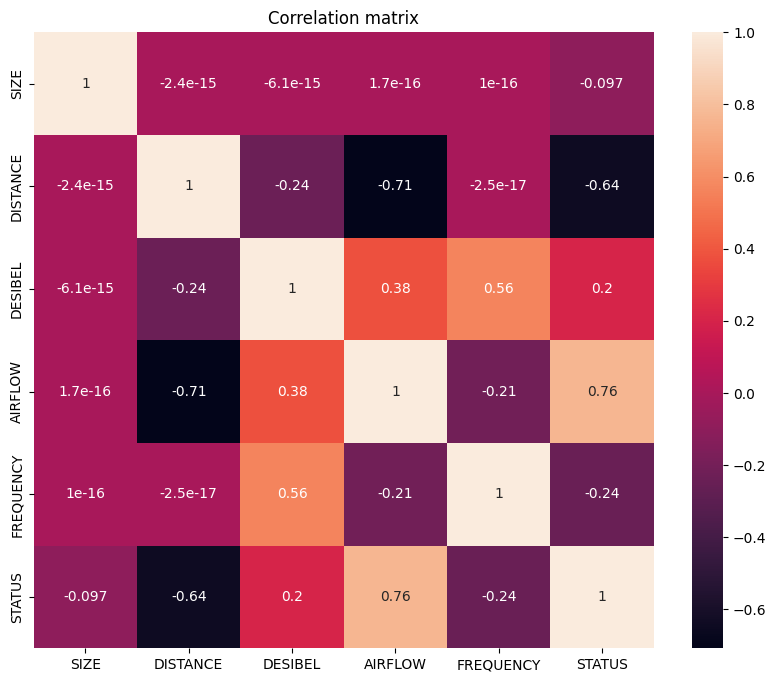

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation matrix')
plt.show()

## **Bivariate Analysis**

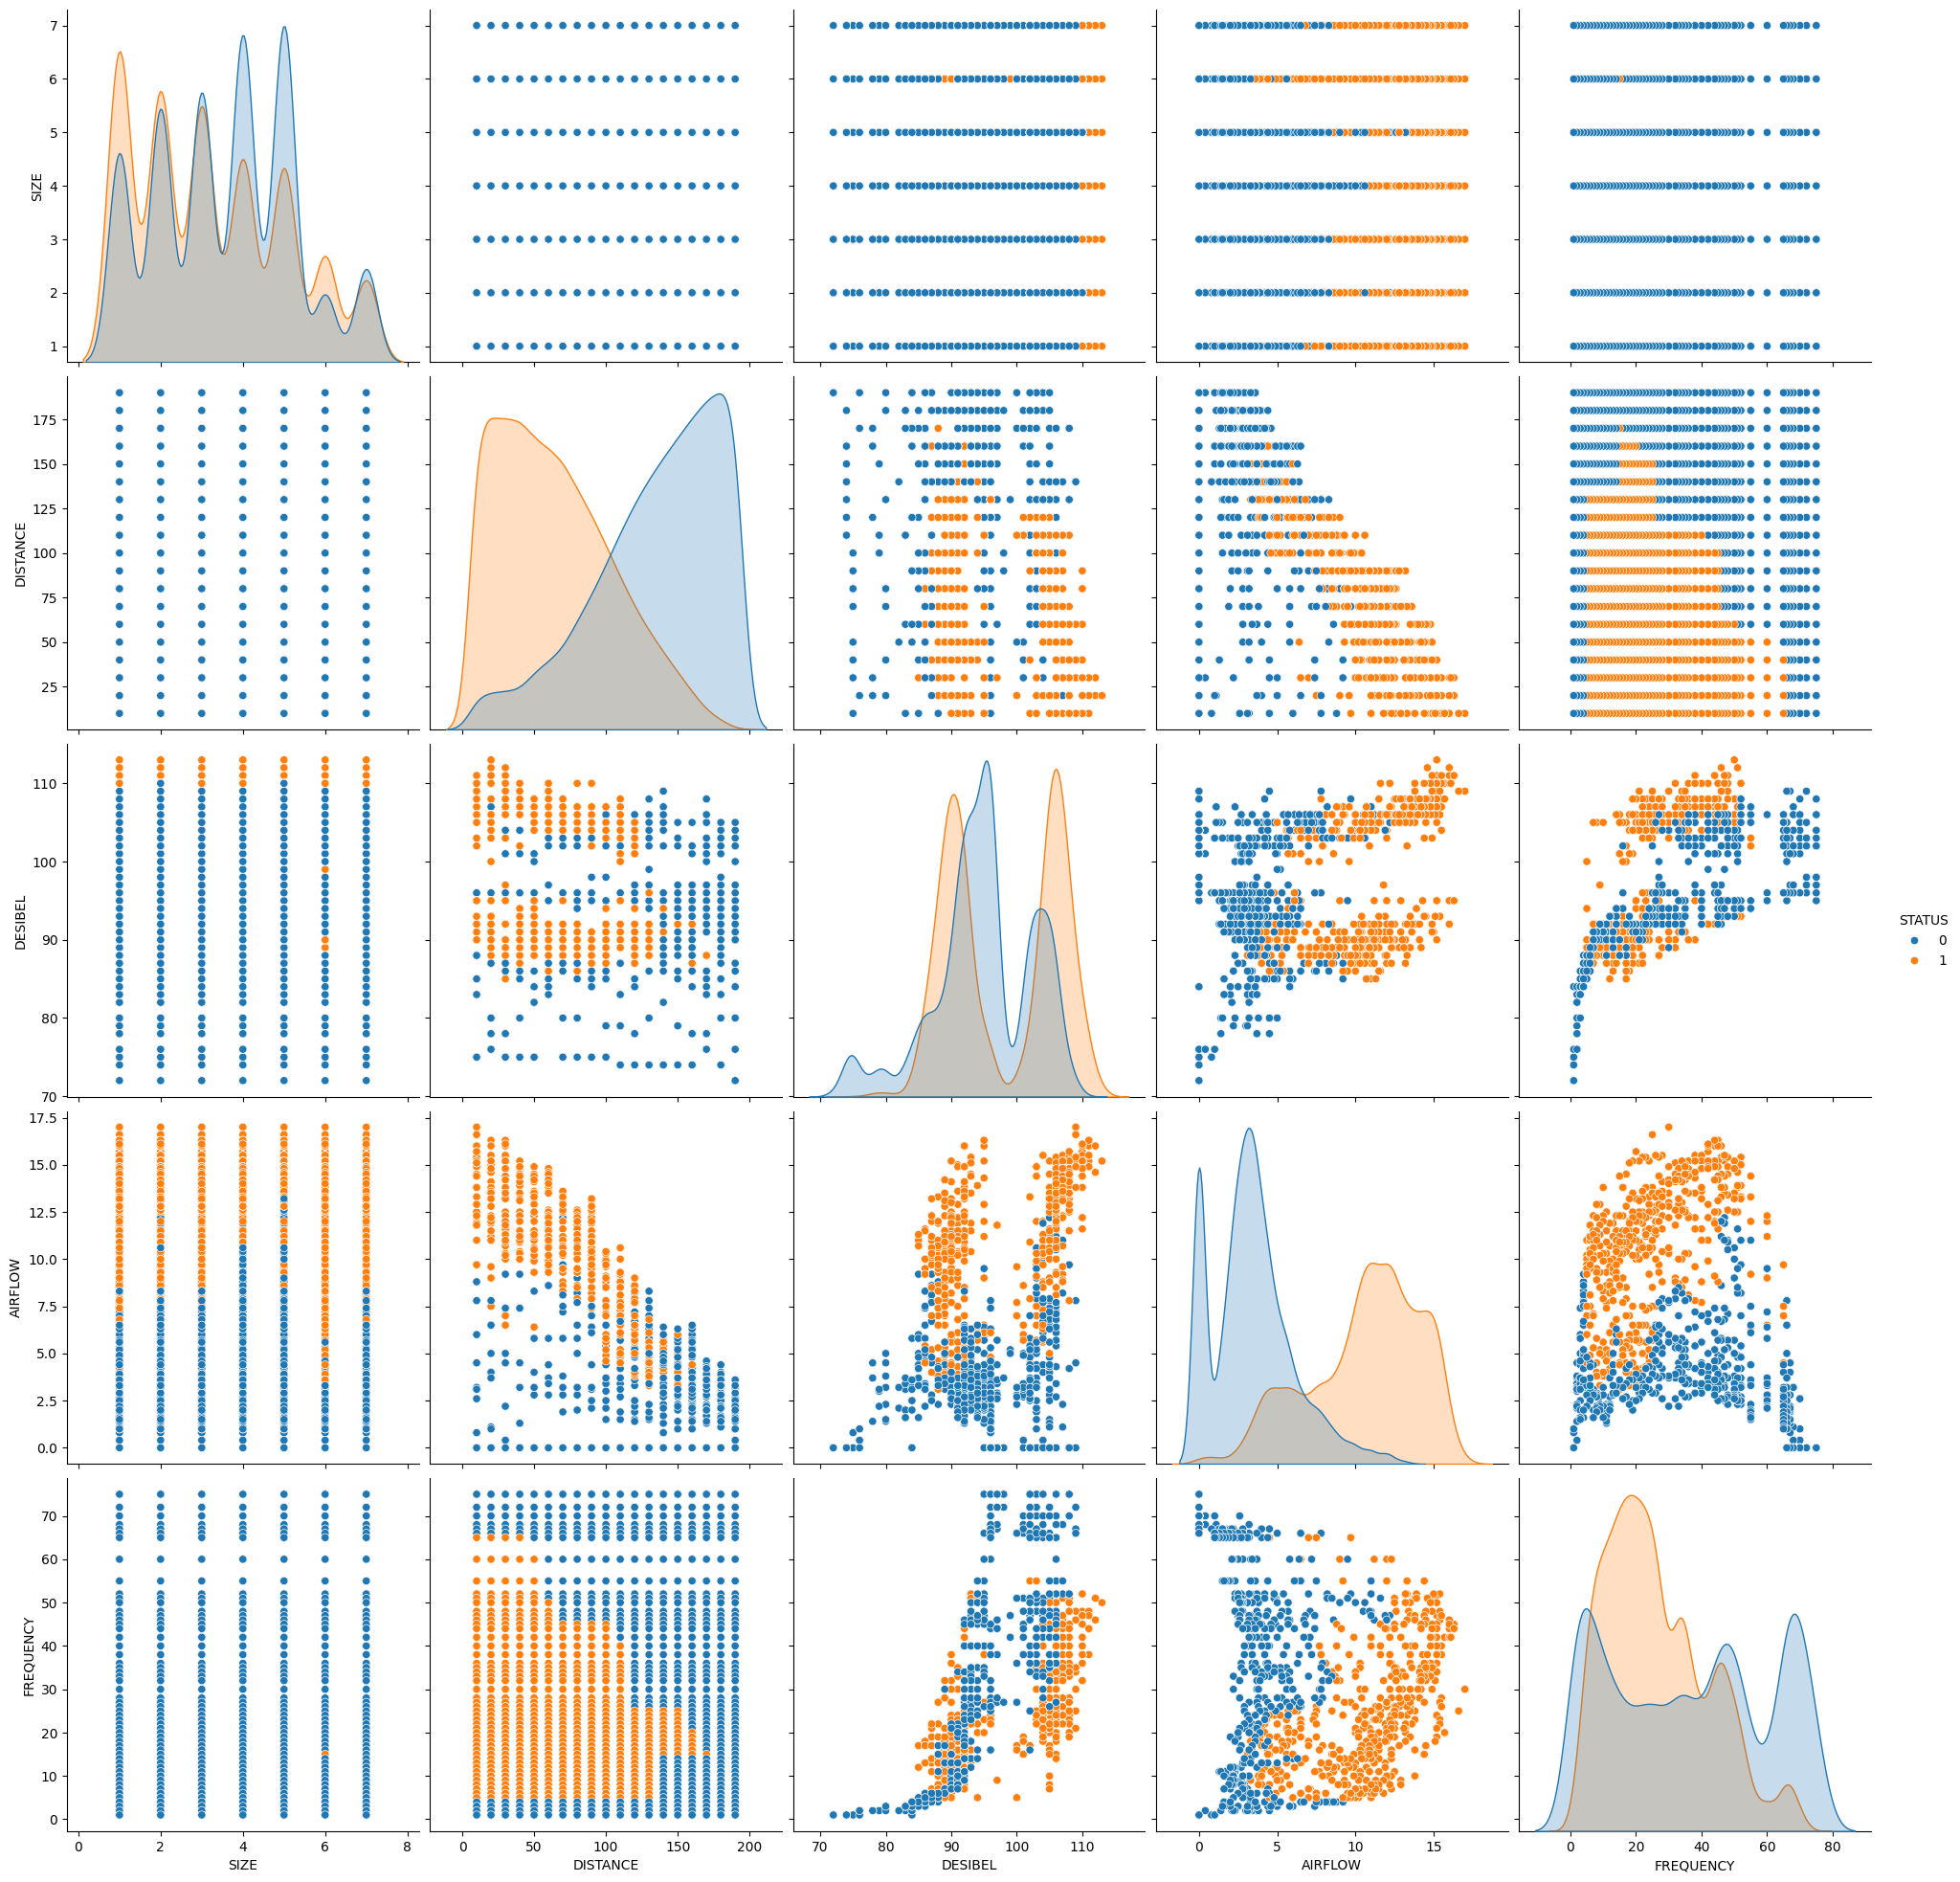

In [ ]:
#Pairplot
sns.pairplot(df, hue='STATUS', height=4)
plt.show()

In [ ]:
df["STATUS"].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

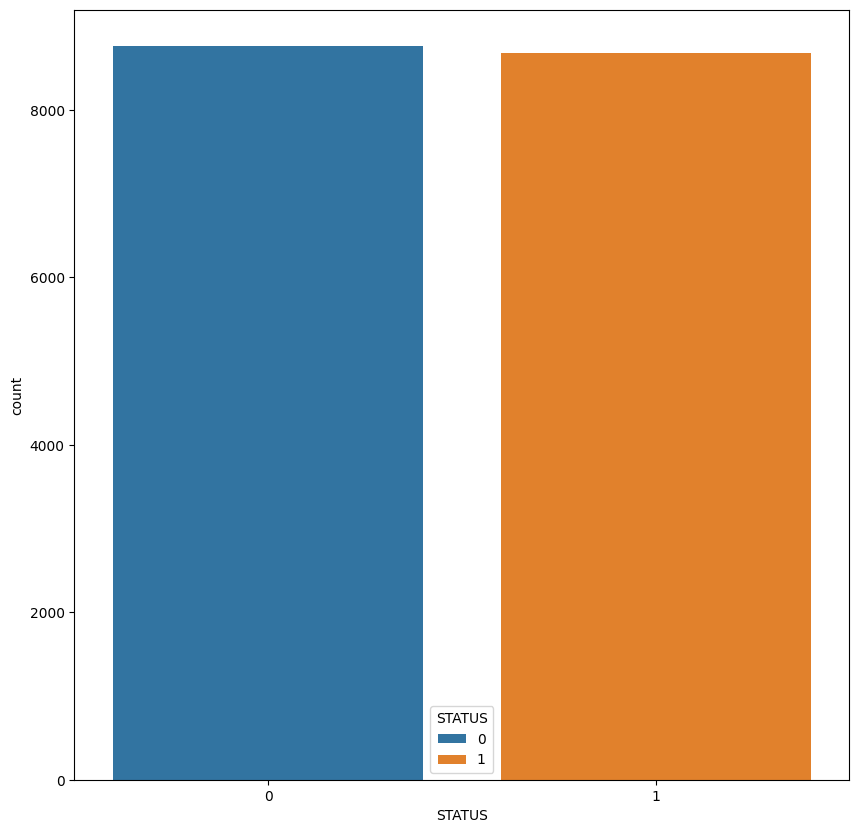

In [ ]:
#Displaying the distribution of the target column
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="STATUS", hue='STATUS');

The target column is very well balanced. There are almost as many rows with status 1 as rows with status 2

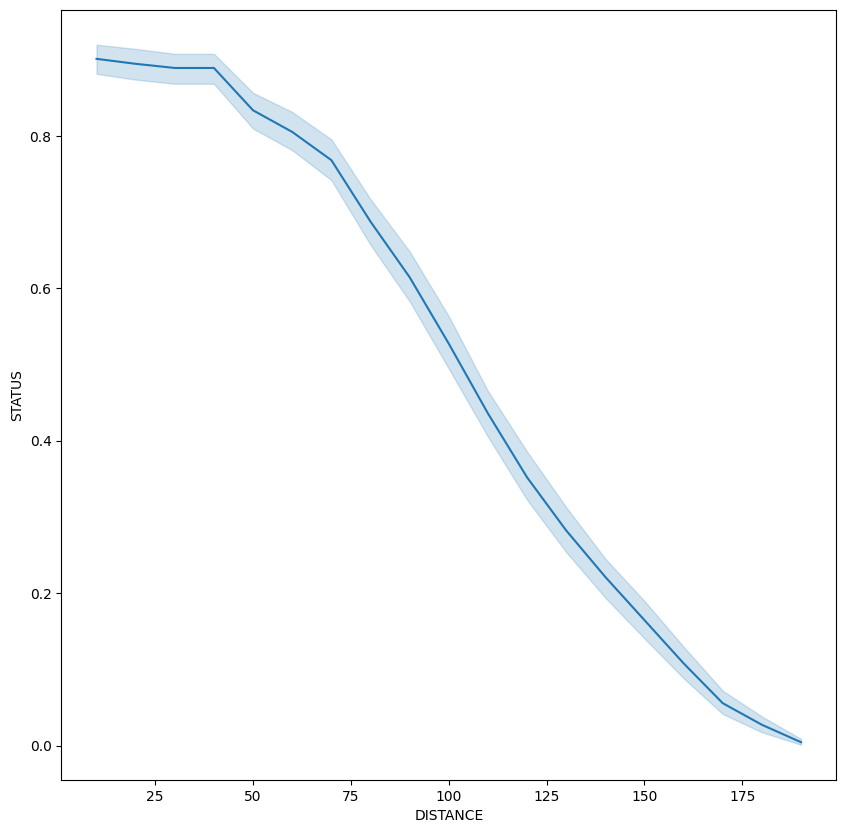

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x="DISTANCE", y='STATUS');

The greater the distance, the more difficult it is to extinguish the flame. It's intuitive but confirmed

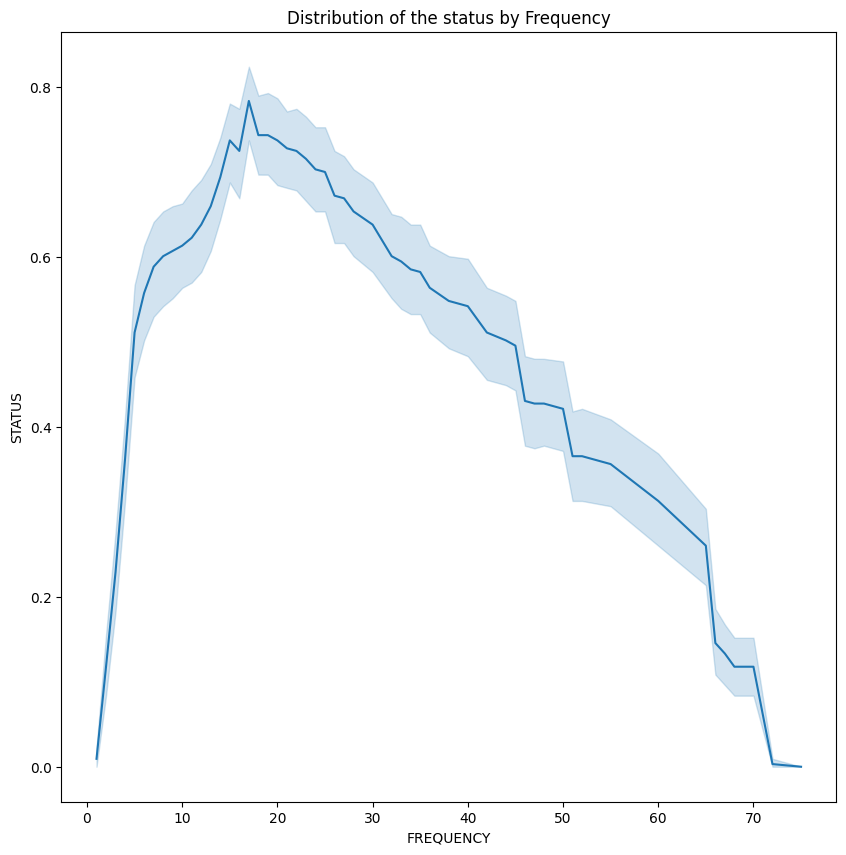

In [ ]:
#Plotting the Status by Frequency
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x="FREQUENCY", y='STATUS')
plt.title('Distribution of the status by Frequency');

The frequency between 15 and 25 Hz is the most likely to extinguish the flame.

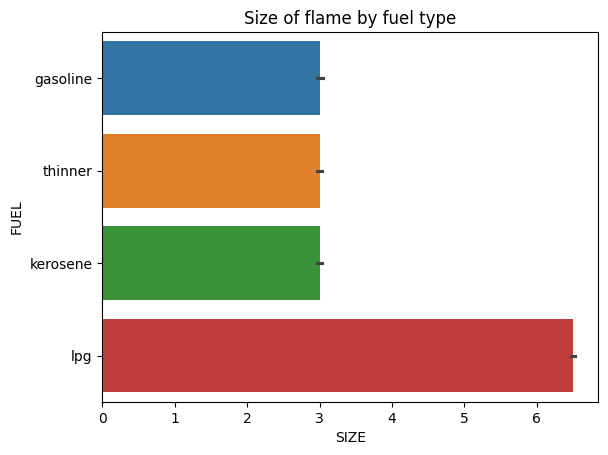

In [ ]:
#Size of the flame by type of fuel
sns.barplot(data=df, x="SIZE", y='FUEL', hue='FUEL')
plt.title('Size of flame by fuel type');

With lpg fuel, the flame size is quite much higher than for liquid fuels

In [ ]:
df.drop(["STATUS"],axis=1)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5
17438,7,lpg,190,84,2.0,4
17439,7,lpg,190,80,1.5,3
17440,7,lpg,190,76,0.4,2


### **A. Seperation of X (features) and Y (target variable)**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -          VARIABLE SEPERATION       - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

print('                 Separating labels from features...')
print()

target = 'STATUS'
feature_list = ['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']


X = df.loc[:, feature_list]
Y = df.loc[:, target]

print('                             ...Done')
print()
print()

print('°°°°°°°° Here are the the FEATURES (X) : °°°°°°°°')
print()
display(X.head())
print()

print('°°°°°°°° Here are the the FEATURES (X) : °°°°°°°°')
print()
print(Y.head())

print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -          VARIABLE SEPERATION       - - - - - - - - - -
----------------------------------------------------------------------


                 Separating labels from features...

                             ...Done


°°°°°°°° Here are the the FEATURES (X) : °°°°°°°°



,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67



°°°°°°°° Here are the the FEATURES (X) : °°°°°°°°

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Dividing dataset into a Train set and a Test set**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -            TRAIN TEST SPLIT        - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

print('           Dividing dataset into a Train set and a Test set...')
print()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

print('                             ...Done')


print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -            TRAIN TEST SPLIT        - - - - - - - - - -
----------------------------------------------------------------------


           Dividing dataset into a Train set and a Test set...

                             ...Done


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Pipeline**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -               PIPELINE             - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()

numerical_features = ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']
categorical_features = ['FUEL']

print('Numerical features column names : ')
print(numerical_features)
print()

print('Categorical feature column name : ')
print(categorical_features)


print()
print('Preprocessor...')

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

print()
print('...Done')

print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -               PIPELINE             - - - - - - - - - -
----------------------------------------------------------------------

Numerical features column names : 
['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']

Categorical feature column name : 
['FUEL']

Preprocessor...

...Done


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Preprocessing**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -             PREPROCESSING          - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

print('°°°°°°°°°°   Preprocessing X_train...    °°°°°°°°°°')
print()
print('--- X_train before preprocessing : ---')
print()
display(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('--- X_train after preprocessing : ---')
print()
print(X_train[0:5])
print()
print('°°°°°°°°°°   ...Done     °°°°°°°°°°')

print()
print()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print()
print()

print('°°°°°°°°°°   Preprocessing X_test...     °°°°°°°°°°')
print()
print('--- X_test before preprocessing : ---')
print()
display(X_test.head())
print()
X_test = preprocessor.transform(X_test)

print('--- X_train after preprocessing : --- ')
print()
print(X_test[0:5])
print()
print('°°°°°°°°°°   ...Done     °°°°°°°°°°')



print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -             PREPROCESSING          - - - - - - - - - -
----------------------------------------------------------------------


°°°°°°°°°°   Preprocessing X_train...    °°°°°°°°°°

--- X_train before preprocessing : ---



,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
13239,3,kerosene,180,103,2.5,52
2680,3,gasoline,120,92,5.7,20
1728,2,gasoline,140,96,0.0,75
16271,6,lpg,170,106,3.4,42
10267,1,kerosene,10,95,12.0,60


--- X_train after preprocessing : ---

[[-0.23475725  1.45548223  0.80958925 -0.94597988  0.97736662  1.
   0.          0.        ]
 [-0.23475725  0.36075183 -0.5357933  -0.27003407 -0.5529575   0.
   0.          0.        ]
 [-0.80650937  0.72566197 -0.04656328 -1.47406255  2.07728709  0.
   0.          0.        ]
 [ 1.48049911  1.27302716  1.17651176 -0.75587012  0.49914034  0.
   1.          0.        ]
 [-1.37826148 -1.64625389 -0.16887079  1.06073425  1.35994766  1.
   0.          0.        ]]

°°°°°°°°°°   ...Done     °°°°°°°°°°


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


°°°°°°°°°°   Preprocessing X_test...     °°°°°°°°°°

--- X_test before preprocessing : ---



,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
14692,5,kerosene,70,103,1.9,67
6976,2,thinner,160,101,2.7,51
8945,4,thinner,140,90,4.5,19
8625,4,thinner,80,89,10.3,15
13114,3,kerosene,150,91,2.8,8



--- X_train after preprocessing : --- 

[[ 0.90874699 -0.55152349  0.80958925 -1.07271972  1.69470606  1.
   0.          0.        ]
 [-0.80650937  1.0905721   0.56497424 -0.90373327  0.929544    0.
   0.          1.        ]
 [ 0.33699487  0.72566197 -0.78040831 -0.52351375 -0.60078013  0.
   0.          1.        ]
 [ 0.33699487 -0.36906843 -0.90271581  0.70163804 -0.79207065  0.
   0.          1.        ]
 [-0.23475725  0.90811703 -0.6581008  -0.88260996 -1.12682905  1.
   0.          0.        ]]

°°°°°°°°°°   ...Done     °°°°°°°°°°


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Train Model**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -        LOGISTIC REGRESSION MODEL    - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

print('                             Train model...')

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

print('                               ...Done')

print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -        LOGISTIC REGRESSION MODEL    - - - - - - - - - -
----------------------------------------------------------------------


                             Train model...
                               ...Done


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Predictions**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -               PREDICTIONS          - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()
print("°°°°°°°°°° PREDICTIONS ON THE TRAINING SET °°°°°°°°°°")
print()
print()

print("                     Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print()
print("                                 ...Done.")
print(Y_train_pred)

print()
print()
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print()
print()

print("                     Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print()
print("                                 ...Done.")
print()
print(Y_train_proba)
print()

print()
print()
print("----------------------------------------------------------------------")
print()
print()
print("°°°°°°°°°° PREDICTIONS ON THE TEST SET °°°°°°°°°°")
print()
print()

print("                         Predictions on test set...")
print()
Y_test_pred = classifier.predict(X_test)
print("                                 ...Done.")
print()
print(Y_test_pred)
print()

print("                         Probabilities on test set...")
print()
Y_test_proba = classifier.predict_proba(X_test)
print("                                     ...Done.")
print(Y_test_proba)
print()


print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -               PREDICTIONS          - - - - - - - - - -
----------------------------------------------------------------------


°°°°°°°°°° PREDICTIONS ON THE TRAINING SET °°°°°°°°°°


                     Predictions on training set...

                                 ...Done.
[0 0 0 ... 1 1 1]


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


                     Probabilities on training set...

                                 ...Done.

[[0.99625194 0.00374806]
 [0.52627399 0.47372601]
 [0.99451098 0.00548902]
 ...
 [0.43206033 0.56793967]
 [0.05962593 0.94037407]
 [0.15888868 0.84111132]]



----------------------------------------------------------------------


°°°°°°°°°° PREDICTIONS ON THE TEST SET °°°°°°°°°°


                         Predictions on test set...

                                 ...Done.

[0 0 0 ... 1 1 1]

                         Probabilities on

### **Score**

In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -                  SCORES            - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

print("°°°°°°°°°° ACCURACY SCORES :  °°°°°°°°°°")
print()
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))


print()
print()
print("----------------------------------------------------------------------")
print()
print()

print("°°°°°°°°°° F1 SCORES :  °°°°°°°°°°")
print()
print("F1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("F1-score on test set : ", f1_score(Y_test, Y_test_pred))


print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
- - - - - - - -                  SCORES            - - - - - - - - - -
----------------------------------------------------------------------


°°°°°°°°°° ACCURACY SCORES :  °°°°°°°°°°

Accuracy on training set :  0.8991614706514728
Accuracy on test set :  0.8993981083404987


----------------------------------------------------------------------


°°°°°°°°°° F1 SCORES :  °°°°°°°°°°

F1-score on training set :  0.8975907999126573
F1-score on test set :  0.8984081041968162


----------------------------------------------------------------------
----------------------------------------------------------------------


### **Confusion Matrix**

----------------------------------------------------------------------
- - - - - - - -           CONFUSION MATRIX         - - - - - - - - - -
----------------------------------------------------------------------




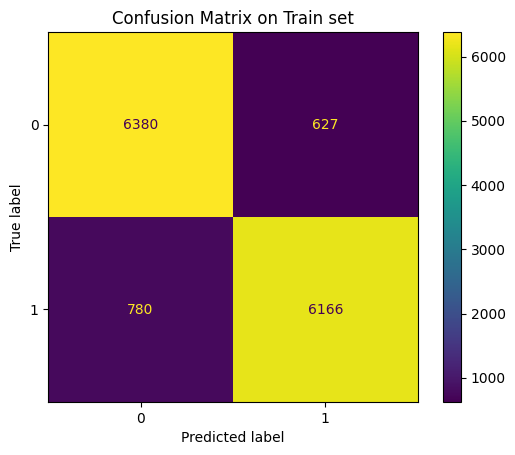

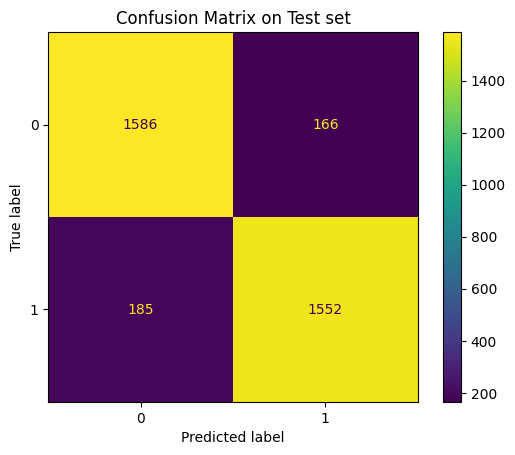



----------------------------------------------------------------------
----------------------------------------------------------------------


In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -           CONFUSION MATRIX         - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

_, ax = plt.subplots()
ax.set(title="Confusion Matrix on Train set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

_, ax = plt.subplots()
ax.set(title="Confusion Matrix on Test set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

### **ROC Curve**

----------------------------------------------------------------------
- - - - - - - -               ROC CURVES           - - - - - - - - - -
----------------------------------------------------------------------




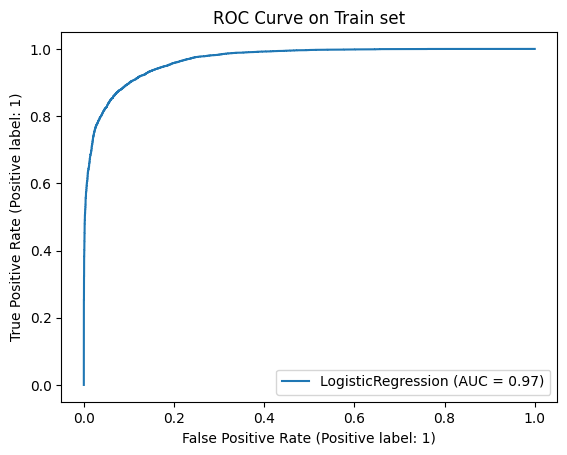

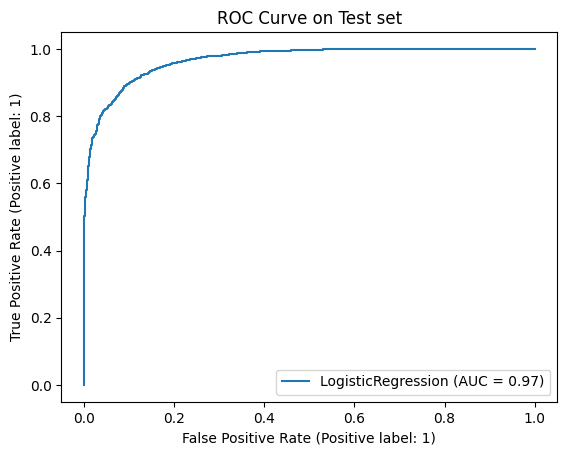



----------------------------------------------------------------------
----------------------------------------------------------------------


In [ ]:
print("----------------------------------------------------------------------")
print('- - - - - - - -               ROC CURVES           - - - - - - - - - -')
print("----------------------------------------------------------------------")
print()
print()

_, ax = plt.subplots()
ax.set(title="ROC Curve on Train set")
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

_, ax = plt.subplots()
ax.set(title="ROC Curve on Test set")
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

print()
print()
print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report

# X et Y doivent être assignés correctement
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# Division du dataset en ensemble d'entraînement et ensemble de test avec stratification
print("Dividing into train and test sets with stratification...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()

# Séparation des caractéristiques numériques et catégorielles
numeric_features = []
categorical_features = []
for i, t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)):
        numeric_features.append(i)
    else:
        categorical_features.append(i)

print('Found numeric features: ', numeric_features)
print('Found categorical features: ', categorical_features)

# Prétraitement des caractéristiques
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Entraînement du modèle XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

# Prédictions sur les ensembles d'entraînement et de test
Y_train_xgb = xgb.predict(X_train)
Y_test_xgb = xgb.predict(X_test)

# Évaluation des performances
print("f1-score on train set: ", f1_score(Y_train, Y_train_xgb))
print("f1-score on test set: ", f1_score(Y_test, Y_test_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_xgb))
print()
print("Classification report:")
print(classification_report(Y_test, Y_test_xgb))

Dividing into train and test sets with stratification...
...Done.

Found numeric features:  ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']
Found categorical features:  ['FUEL']
f1-score on train set:  0.9971916180600562
f1-score on test set:  0.978968596946125
Confusion Matrix:
 [[1717   35]
 [  38 1699]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1752
           1       0.98      0.98      0.98      1737

    accuracy                           0.98      3489
   macro avg       0.98      0.98      0.98      3489
weighted avg       0.98      0.98      0.98      3489



Utilisation du modèle SVC (Standard Vector Machine)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

X = df.drop(['STATUS'], axis=1)
Y = df['STATUS']

# Transfomation de la colonne FUEL de str en float
categorical_transformer = OneHotEncoder()

# Mise à l'échelle
numeric_transformer = StandardScaler()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']),
        ('cat', categorical_transformer, ['FUEL'])
    ])

# Création du pipeline incluant SVM :
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Division en ensembles d'apprentissage et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

# Entraînement du modèle
pipeline.fit(X_train, Y_train)

# Prédictions
Y_pred = pipeline.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9486959014044138
Confusion Matrix:
 [[1674   78]
 [ 101 1636]]


 # Decision Tree Classifier

In [ ]:
#prepeocessing
target = 'STATUS'
feature_list = ['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']


X = df.loc[:, feature_list]
Y = df.loc[:, target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

numerical_features = ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']
categorical_features = ['FUEL']

print('Numerical features column names : ')
print(numerical_features)

print('Categorical feature column name : ')
print(categorical_features)

#processor

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


Numerical features column names : 
['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']
Categorical feature column name : 
['FUEL']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('- - - - - - - - Decision Tree Classifier - - - - - - - -')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print()
# Perform grid search
print("Grid search...")
classifier_dt = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    "max_depth": [4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8],
}
gridsearch = GridSearchCV(
    classifier_dt, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

- - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - Decision Tree Classifier - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - -

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best validation accuracy :  0.9489715473374902


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")

# get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")

Predictions on training set...
...Done.
Probabilities on training set...
...Done.
Predictions on test set...
...Done.
Probabilities on test set...
...Done.


In [ ]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

accuracy on training set :  0.9754891421199742
accuracy on test set :  0.9521352823158498

f1-score on training set :  0.9752532561505064
f1-score on test set :  0.9518037518037519


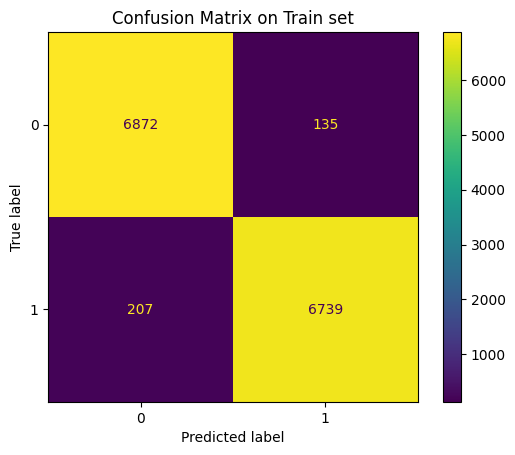

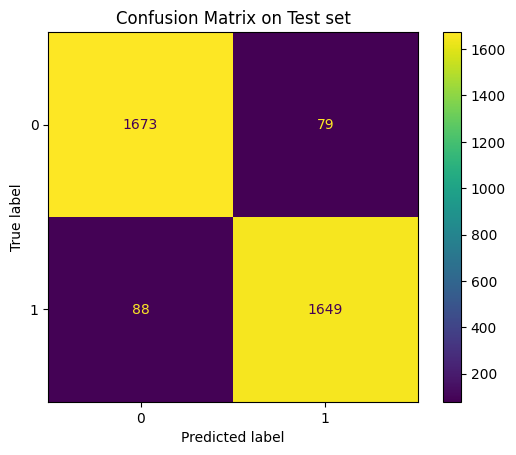

In [ ]:
# Visualize confusion matrices
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    gridsearch, X_train, Y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    gridsearch, X_test, Y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()